##Using new complex plane calculations for radial velocity texture
Scott Collis and Jonathan Helmus



In [1]:
import pyart
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
radar = pyart.io.read('/data/sample_sapr_data/csapr_july9/sgpcsaprsurI7.00.20150709.111301.raw.cfrad.20150709_102911.531_CSAP_v4450_SUR.nc')

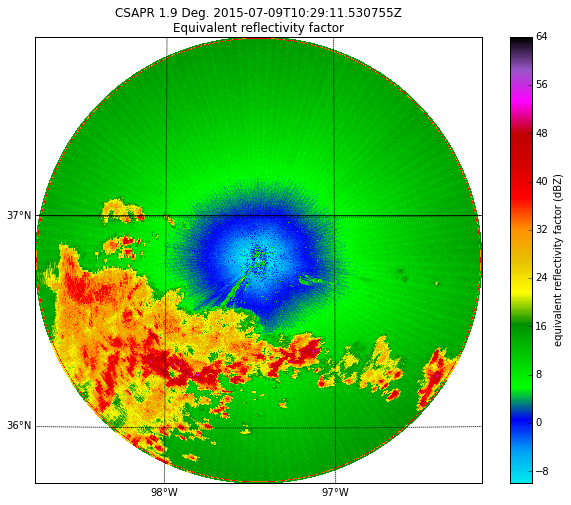

In [3]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('reflectivity', sweep = 2, resolution = 'i',
                    vmin = -10, vmax = 64, mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef)


In [4]:
phidp_text = pyart.retrieve.texture_of_complex_phase(radar)
radar.add_field('differential_phase_texture', phidp_text, replace_existing = True)
snr = pyart.retrieve.calculate_snr_from_reflectivity(radar)
radar.add_field('SNR', snr, replace_existing = True)

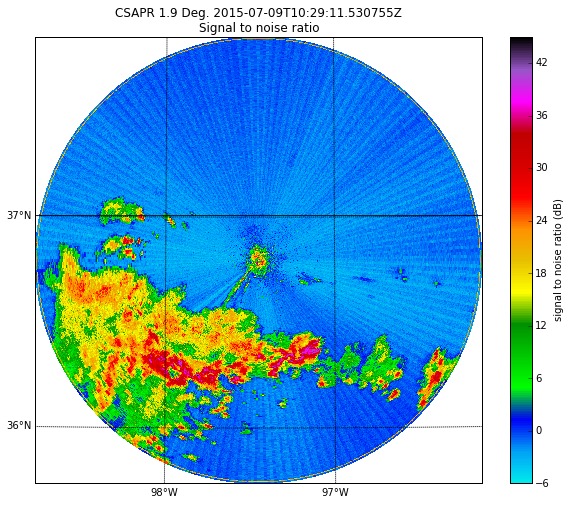

In [17]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('SNR', sweep = 2, resolution = 'i',
                     vmax = 45, mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef)


In [7]:
my_snr_field =  radar.fields['SNR']['data'][lowest_tilt.start:lowest_tilt.stop, 190::]
my_range_field = radar.range['data'][190::]
my_texture_field =  radar.fields['differential_phase_texture']['data'][lowest_tilt.start:lowest_tilt.stop, 190::]
my_time_field = radar.time['data'][lowest_tilt.start:lowest_tilt.stop]

<matplotlib.colorbar.Colorbar instance at 0x10bf7bb90>

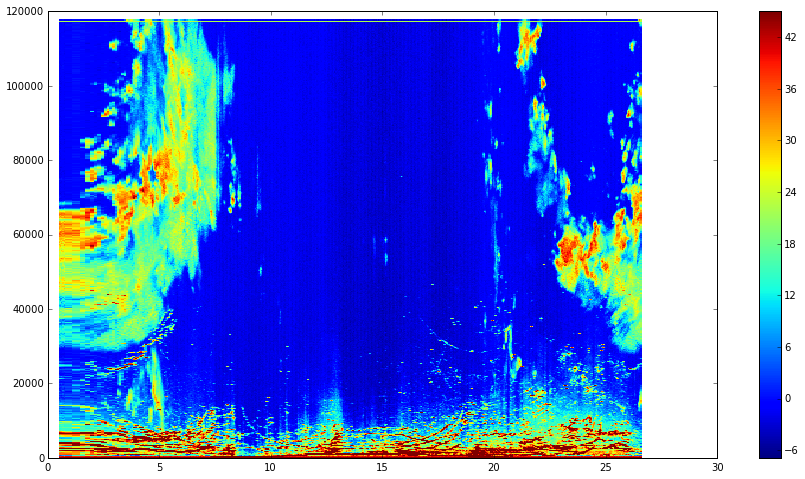

In [5]:
fig = plt.figure(figsize = [15,8])
lowest_tilt = radar.get_slice(0)
plt.pcolormesh(radar.time['data'][lowest_tilt.start:lowest_tilt.stop], radar.range['data'],
               radar.fields['SNR']['data'][lowest_tilt.start:lowest_tilt.stop, :].transpose(), 
              vmax = 45)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10b64eb00>

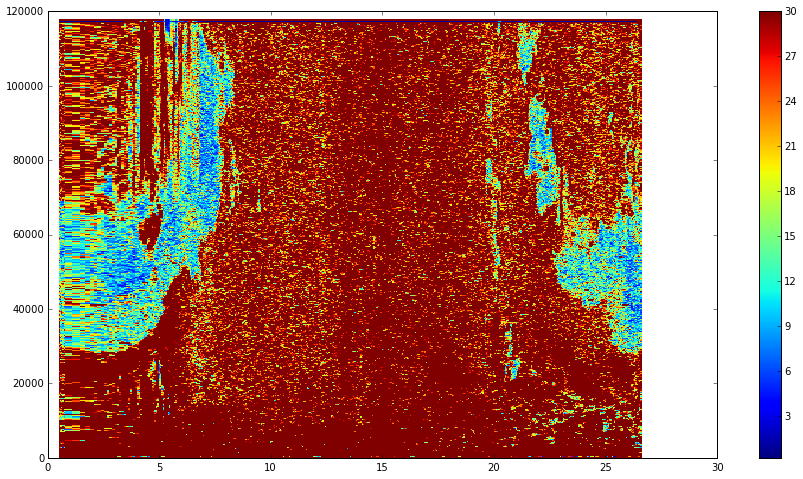

In [6]:
fig = plt.figure(figsize = [15,8])
lowest_tilt = radar.get_slice(0)
plt.pcolormesh(radar.time['data'][lowest_tilt.start:lowest_tilt.stop], radar.range['data'],
               radar.fields['differential_phase_texture']['data'][lowest_tilt.start:lowest_tilt.stop, :].transpose(),
              vmax = 30)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10b89ddd0>

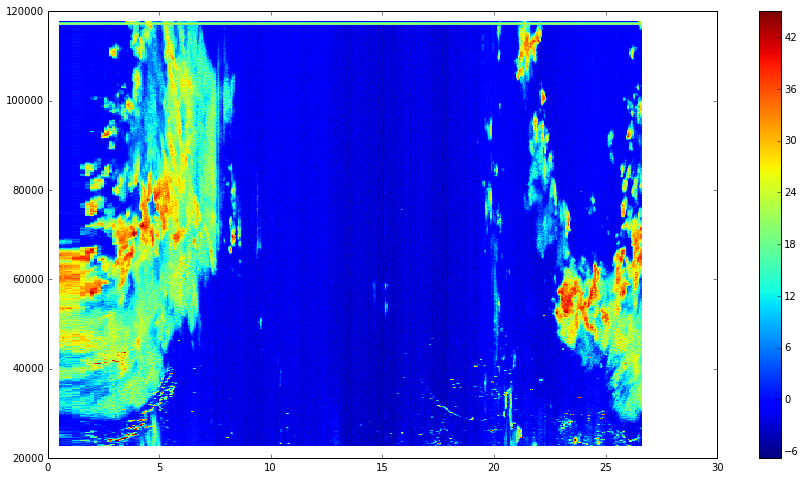

In [8]:
fig = plt.figure(figsize = [15,8])
lowest_tilt = radar.get_slice(0)
plt.pcolormesh(my_time_field, my_range_field, my_snr_field.transpose(), vmax = 45)
plt.colorbar()

In [9]:
likely_not_returns = np.logical_or(my_texture_field < 19, my_snr_field > 0)

In [10]:
noise_floor_snr = np.ma.masked_where(likely_not_returns, my_snr_field) 

<matplotlib.colorbar.Colorbar instance at 0x10c2596c8>

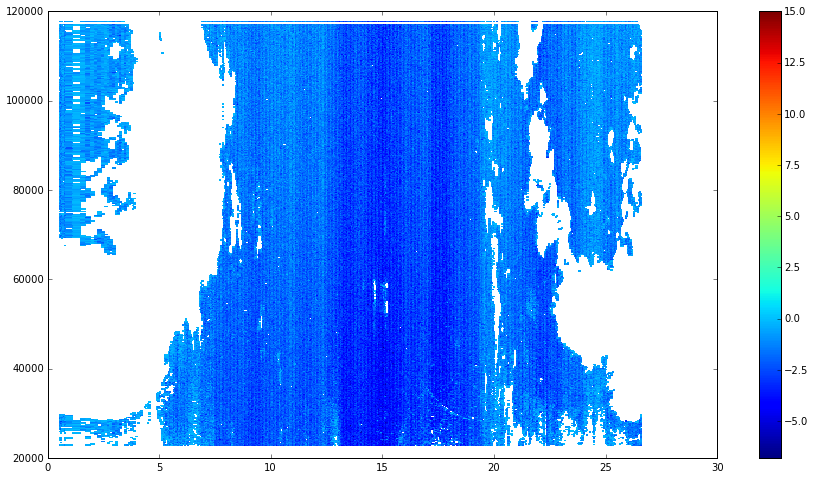

In [11]:
fig = plt.figure(figsize = [15,8])
lowest_tilt = radar.get_slice(0)
plt.pcolormesh(my_time_field, my_range_field, noise_floor_snr.transpose(), vmax = 15)
plt.colorbar()

In [12]:
time_variant_snr = noise_floor_snr.mean(axis = 1 )

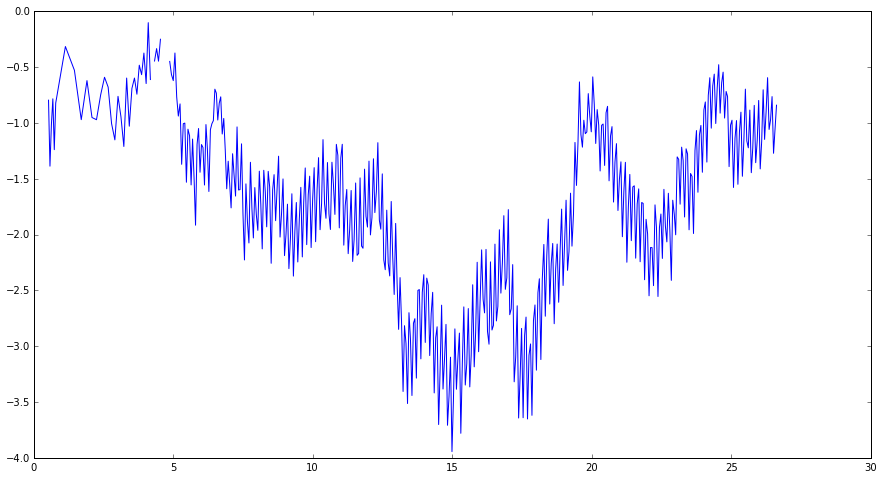

In [13]:
plt.figure(figsize = [15,8])
plt.plot(my_time_field,  time_variant_snr)

In [14]:
fft_complex = np.fft.fft(time_variant_snr)
power = np.absolute(fft_complex)
freqs = np.fft.fftfreq(len(time_variant_snr))

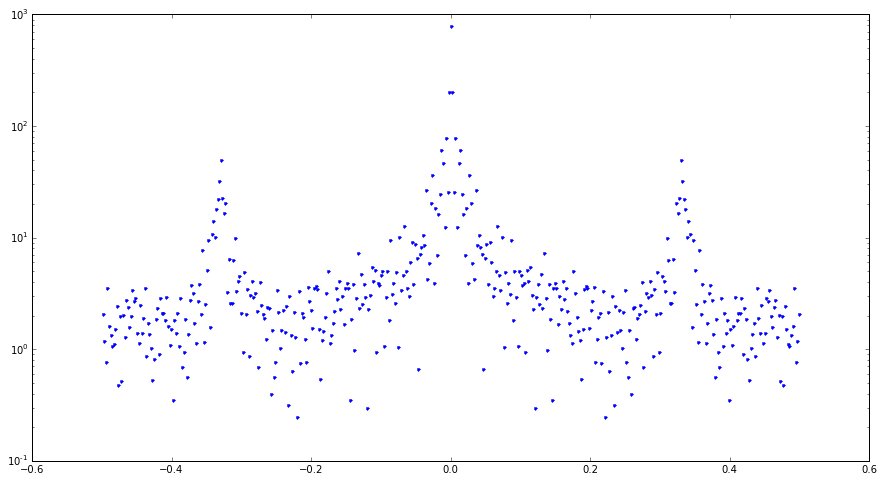

In [15]:
plt.figure(figsize = [15,8])
plt.plot(freqs, power, 'b.')
plt.gca().set_yscale('log')

(10, 15)

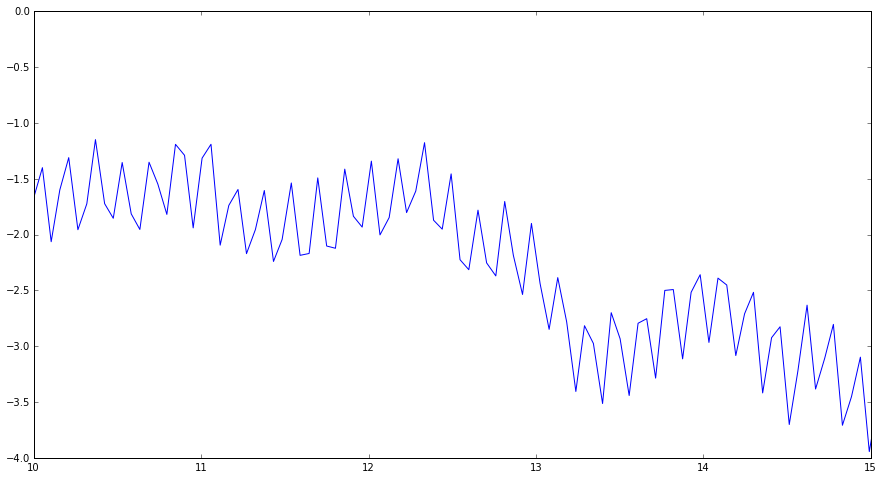

In [18]:
plt.figure(figsize = [15,8])
plt.plot(my_time_field,  time_variant_snr)
plt.xlim([10,15])